**Data analytics Clustering Project**


**Import libraries**

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import re
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler 
import sklearn
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import normalize 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA 

%matplotlib inline

In [247]:
df = pd.read_csv('/content/football_data.csv')

In [248]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [249]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

**Data Processing: Attributes like height and weight can be modified into numeric values**

In [250]:
Height = []
for (columnName, columnData) in df.iteritems():
  if columnName == "Weight":
    df[columnName] = df[columnName].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))
  if columnName == "Height":
    for height in columnData.values:
      if type(height) is str:
        modified_height_split = re.split("'",str(height))
        modified_height = (12 * int(modified_height_split[0])) + int(modified_height_split[1])
        Height.append(float(modified_height))
      else:
        Height.append(float(height))
df.insert(10, "Height", Height, True)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Height,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,67.0,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,74.0,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,69.0,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,76.0,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,71.0,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Extracting numeric values**

In [251]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cluster = df.select_dtypes(include=numerics)
print(cluster.head())


   Unnamed: 0      ID  Age  ...  GKKicking  GKPositioning  GKReflexes
0           0  158023   31  ...       15.0           14.0         8.0
1           1   20801   33  ...       15.0           14.0        11.0
2           2  190871   26  ...       15.0           15.0        11.0
3           3  193080   27  ...       87.0           88.0        94.0
4           4  192985   27  ...        5.0           10.0        13.0

[5 rows x 46 columns]


In [252]:
print(cluster.keys())

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Height', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [253]:
cluster.isnull().sum()

Unnamed: 0                   0
ID                           0
Age                          0
Overall                      0
Potential                    0
Height                      48
Special                      0
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Jersey Number               60
Weight                      48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength                    48
LongShots                   48
Aggressi

**Removing empty rows**

In [255]:
final = cluster[cluster['Jersey Number'].notna()]
final.isnull().sum()

Unnamed: 0                  0
ID                          0
Age                         0
Overall                     0
Potential                   0
Height                      0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Intercepti

In [256]:
final.drop('Unnamed: 0',axis='columns', inplace=True)
final.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,Age,Overall,Potential,Height,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,214279.818868,25.121122,66.253926,71.324076,71.361988,1598.002645,1.113297,2.947154,2.361492,19.546096,165.982972,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019
std,29970.319078,4.669796,6.913320,6.132286,2.649738,272.882706,0.394150,0.660498,0.756274,15.947765,15.593388,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521
min,16.000000,16.000000,46.000000,48.000000,61.000000,731.000000,1.000000,1.000000,1.000000,1.000000,110.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200305.500000,21.000000,62.000000,67.000000,69.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,154.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221740.000000,25.000000,66.000000,71.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,165.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236512.500000,28.000000,71.000000,75.000000,73.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,176.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,81.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,243.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.00000

**Scaling the data**

In [257]:
X = StandardScaler().fit_transform(final)
final = pd.DataFrame(X,columns=final.columns)
final.describe()

,ID,Age,Overall,Potential,Height,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04
mean,-5.971234e-16,2.015669e-14,-3.607731e-14,-1.005716e-14,1.248831e-15,-2.721420e-15,-5.481011e-14,5.856061e-15,7.455584e-14,-3.449394e-15,-1.411727e-15,-6.198088e-15,-1.645818e-14,-3.052933e-15,-2.039129e-15,-1.159526e-14,1.908431e-15,-2.931957e-15,5.614191e-16,7.479796e-17,1.158409e-14,7.419045e-16,-8.283688e-15,-8.790566e-16,-8.209300e-16,-2.465730e-16,1.678133e-15,-4.669091e-16,-3.396853e-15,-2.320979e-15,6.510041e-16,-2.534622e-15,-2.323744e-15,-8.564532e-15,-1.368587e-15,1.030102e-15,-8.450065e-15,-3.078744e-15,2.766280e-15,1.897546e-14,-2.576786e-16,5.257362e-16,1.298227e-16,4.031112e-17,-4.603935e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-7.149397e+00,-1.953270e+00,-2.929777e+00,-3.803593e+00,-3.910678e+00,-3.177286e+00,-2.874540e-01,-2.948092e+00,-1.800313e+00,-1.162960e+00,-3.590273e+00,-2.436235e+00,-2.230268e+00,-2.778897e+00,-3.517732e+00,-2.199000e+00,-2.716580e+00,-2.238389e+00,-2.280724e+00,-2.852985e+00,-3.198936e+00,-3.523989e+00,-3.598723e+00,-3.351805e+00,-4.532240e+00,-3.393136e+00,-3.102119e+00,-4.237103e+00,-3.222305e+00,-3.849435e+00,-2.290094e+00,-2.584126e+00,-2.111562e+00,-2.455830e+00,-3.068511e+00,-2.773181e+00,-4.865960e+00,-2.225441e+00,-2.109671e+00,-2.004302e+00,-8.824046e-01,-9.103661e-01,-9.230106e-01,-9.033308e-01,-8.749789e-01
25%,-4.662848e-01,-8.825300e-01,-6.153401e-01,-7.051522e-01,-8.914290e-01,-5.167294e-01,-2.874540e-01,8.001189e-02,-4.780043e-01,-7.240145e-01,-7.684862e-01,-6.392167e-01,-7.963488e-01,-4.775695e-01,-3.195112e-01,-7.296929e-01,-3.371012e-01,-7.162774e-01,-6.788525e-01,-6.343570e-01,-2.621984e-01,-5.099046e-01,-5.273387e-01,-5.756351e-01,-6.480159e-01,-5.634175e-01,-6.072042e-01,-5.998167e-01,-4.543033e-01,-5.830579e-01,-7.326726e-01,-6.838667e-01,-1.000284e+00,-6.125059e-01,-6.650393e-01,-6.079453e-01,-6.689906e-01,-8.686502e-01,-9.556316e-01,-1.017802e+00,-4.868825e-01,-4.963977e-01,-4.988619e-01,-4.924498e-01,-4.851593e-01
50%,2.489258e-01,-2.593802e-02,-3.673101e-02,-5.284889e-02,-1.366166e-01,1.355834e-01,-2.874540e-01,8.001189e-02,-4.780043e-01,-1.596566e-01,-6.303951e-02,2.320651e-01,1.766676e-01,2.128287e-01,2.248668e-01,6.147260e-02,2.974265e-01,4.477820e-02,-1.067555e-01,2.139418e-01,2.772024e-01,1.598919e-01,1.551912e-01,1.691910e-01,1.785112e-02,1.440120e-01,2.050935e-01,7.688763e-02,1.747880e-01,1.339517e-01,2.017802e-01,1.798873e-01,2.559437e-01,2.579529e-01,1.125545e-01

**Scaling and normalizing the data**

In [258]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(final) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,0.014071,-0.011467,-0.014191,-0.010993,-0.013513,0.020025,-0.018259,0.003971,0.012028,-0.003931,-0.014753,0.021778,0.014831,0.021811,0.023147,0.012611,0.024148,0.015311,0.013112,0.020054,0.024119,0.023651,0.024043,0.019585,-0.008899,0.018572,0.016536,0.006538,0.026483,0.002425,0.016060,0.018688,0.019144,0.020447,0.009141,0.013951,0.002306,0.020997,0.021617,0.021521,-0.034450,-0.034411,-0.034293,-0.034232,-0.034362
std,0.155915,0.174939,0.160309,0.172279,0.168128,0.130250,0.118845,0.169489,0.148371,0.164507,0.166739,0.143934,0.153792,0.134263,0.128319,0.149322,0.128254,0.147730,0.152989,0.147721,0.120209,0.144849,0.145923,0.149108,0.160355,0.152136,0.144196,0.172340,0.143301,0.171876,0.148572,0.156031,0.166942,0.140248,0.156815,0.146162,0.152865,0.161462,0.164353,0.166567,0.099798,0.099974,0.100462,0.099824,0.099604
min,-0.827820,-0.532847,-0.538969,-0.652645,-0.600333,-0.230949,-0.113128,-0.635371,-0.226939,-0.360157,-0.599210,-0.540369,-0.429914,-0.447113,-0.440832,-0.379343,-0.376658,-0.345125,-0.364346,-0.480700,-0.412859,-0.476849,-0.505562,-0.498953,-0.580822,-0.547777,-0.467708,-0.627433,-0.496411,-0.649180,-0.371119,-0.498752,-0.416718,-0.409534,-0.483734,-0.492014,-0.519408,-0.425128,-0.413234,-0.418145,-0.232709,-0.240083,-0.243418,-0.293057,-0.230751
25%,-0.078298,-0.145260,-0.118283,-0.124618,-0.133735,-0.097559,-0.062823,0.006793,-0.108385,-0.112251,-0.132844,-0.122855,-0.135358,-0.087478,-0.067323,-0.127542,-0.067735,-0.128444,-0.123248,-0.106136,-0.053408,-0.087789,-0.085853,-0.094724,-0.121805,-0.092237,-0.107961,-0.099975,-0.082706,-0.099082,-0.131963,-0.110305,-0.124852,-0.117706,-0.106889,-0.118045,-0.113276,-0.127073,-0.127054,-0.124883,-0.088895,-0.089236,-0.089767,-0.088887,-0.088382
50%,0.041492,-0.005919,-0.006678,-0.010141,-0.015770,0.029210,-0.052982,0.015013,-0.076976,-0.026325,-0.012564,0.047442,0.032830,0.037539,0.050604,0.011030,0.061617,0.013782,-0.016571,0.043002,0.055170,0.034936,0.034392,0.030523,0.004040,0.027373,0.044372,0.013445,0.038768,0.014316,0.043503,0.032495,0.050781,0.054075,0.021552,0.008364,0.009661,0.051740,0.064672,0.058506,-0.057127,-0.057049,-0.056878,-0.056684,-0.057607
75%,0.134682,0.114606,0.109308,0.108038,0.109458,0.133361,-0.041678,0.019869,0.154966,0.067383,0.100659,0.144171,0.151753,0.129763,0.124453,0.144018,0.126221,0.147226,0.144727,0.141778,0.120476,0.131748,0.130009,0.134733,0.114658,0.132529,0.135668,0.122024,0.128085,0.127996,0.146722,0.142869,0.168017,0.137530,0.141532,0.136710,0.127608,0.162727,0.168971,0.170245,-0.026622,-0.025399,-0.024115,-0.025662,-0.027505
max,0.368199,0.585693,0.346769,0.514911,0.602555,0.266295,0.706445,0.731876,0.577658,0.846781,0.607458,0.379813,0.378751,0.369079,0.404410,0.421228,0.355005,0.382785,0.476343,0.444610,0.285642,0.518088,0.523057,0.498029,0.388167,0.488020,0.400395,0.550597,0.514336,0.452536,0.357054,0.531779,0.390130,0.331382,0.440462,0.453091,0.410929,0.466293,0.354203,0.406868,0.327776,0.326059,0.369693,0.330076,0.333171


**Apply PCA. This dataset is used in all the algorithm**

In [259]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(10) 

,P1,P2
0,-0.637321,0.104995
1,-0.568616,-0.061216
2,-0.613905,0.136559
3,0.428310,-0.021056
4,-0.696909,-0.100902
5,-0.687170,0.118806
6,-0.698817,-0.117090
7,-0.546333,-0.095174
8,-0.511855,-0.470478
9,0.563734,-0.022693


**Data visualization**


In [260]:
final.keys()

Index(['ID', 'Age', 'Overall', 'Potential', 'Height', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [261]:
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Height,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,67.0,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,74.0,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,69.0,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,76.0,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,71.0,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


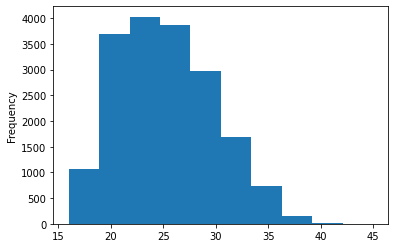

In [262]:
df['Age'].plot(kind='hist')

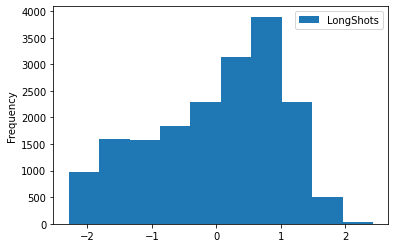

In [263]:
final.plot( x='Stamina', y='LongShots', kind='hist')


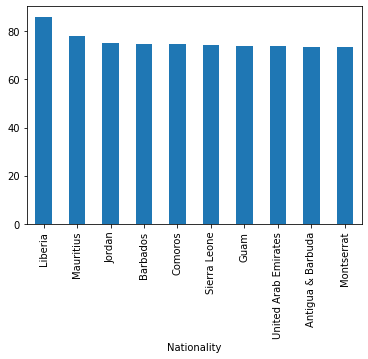

In [264]:
df.groupby("Nationality").Stamina.mean().sort_values(ascending=False)[:10].plot.bar()


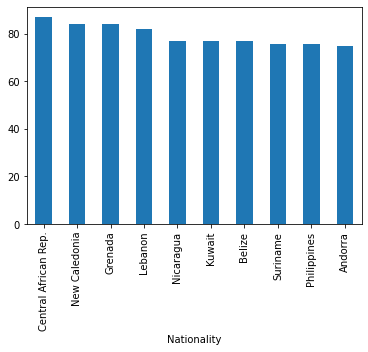

In [265]:
df.groupby("Nationality").Strength.mean().sort_values(ascending=False)[:10].plot.bar()
# df.keys()


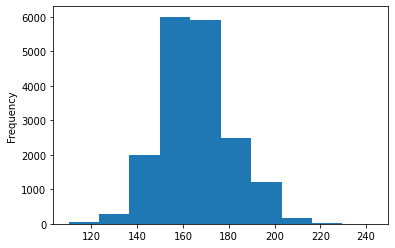

In [266]:
# df.head(5)
df['Weight'].plot(kind='hist')

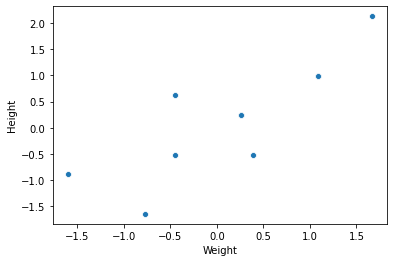

In [268]:
sb.scatterplot(x='Weight',y='Height',data=final.sample(10))

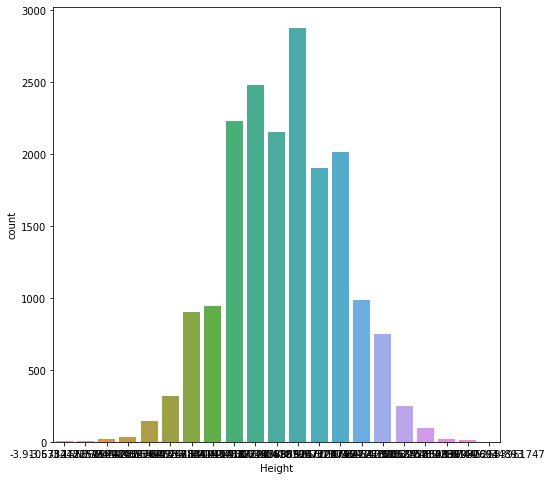

In [270]:
fig, ax = plt.subplots(figsize = (8,8))
sb.countplot(x ='Height', data = final, ax=ax) 

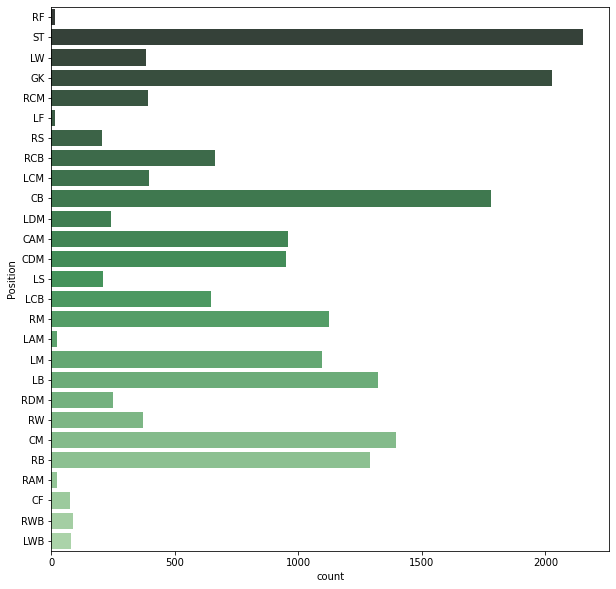

In [271]:
fig, ax=plt.subplots(figsize=(10,10))
sb.countplot(y='Position', data=df, palette="Greens_d",ax=ax)


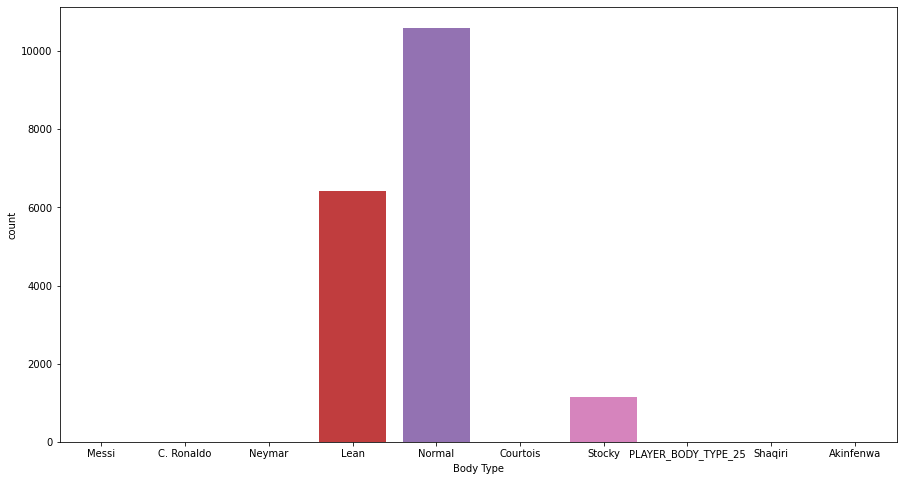

In [275]:
fig, ax = plt.subplots(figsize = (15,8))
sb.countplot(x ='Body Type', data = df, ax=ax) 

**K Mean Algorithm**

In [276]:
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [distance.euclidean(features , self.centroids[centroid]) for centroid in self.centroids]

				# distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break
		return self.classes		

	

**For K=3**

In [277]:
X=X_principal.values
km = K_Means(3)
clus=km.fit(X)
print("For k=3")
for i in range(3):
  print(len(clus[i]))

For k=3
6724
5941
5482


**Scatter plot for k=3**

0.3623262135661571


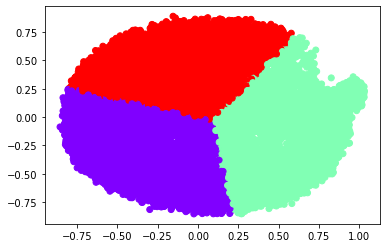

In [279]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c =kmeans.labels_ , cmap ='rainbow')

print(sum(np.min(cdist(X_principal, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X_principal.shape[0])

In [280]:
clustering = []
for i in range(3):
  clustering.append(pd.DataFrame(clus[i],columns=X_principal.columns))
clustering[0].describe()


,P1,P2
count,6724.000000,6724.000000
mean,-0.412080,-0.278826
std,0.271680,0.256504
min,-0.854787,-0.853403
25%,-0.645550,-0.475235
50%,-0.462301,-0.272216
75%,-0.203643,-0.073692
max,0.213126,0.233874


**For k=5**

In [281]:
km = K_Means(5)
clus=km.fit(X)
print("For k=5")
for i in range(5):
  print(len(clus[i]))

For k=5
3996
3315
3122
3399
4315


0.2529027637472123


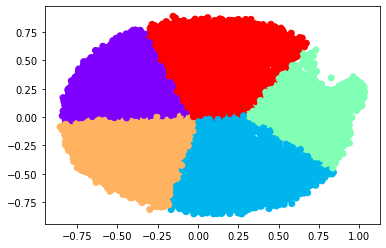

In [282]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c =kmeans.labels_ , cmap ='rainbow')

print(sum(np.min(cdist(X_principal, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X_principal.shape[0])

In [283]:
clustering = []
for i in range(5):
  clustering.append(pd.DataFrame(clus[i],columns=X_principal.columns))
clustering[0].describe()

,P1,P2
count,3996.000000,3996.000000
mean,-0.517805,0.282608
std,0.169107,0.187281
min,-0.840727,-0.037676
25%,-0.655629,0.120821
50%,-0.533093,0.271713
75%,-0.392565,0.428317
max,-0.071379,0.767825


**For k=7**

In [284]:
km = K_Means(7)
clus=km.fit(X)
print("For k=7")
for i in range(7):
  print(len(clus[i]))

For k=7
1728
2190
2265
3005
3520
3298
2141


0.2111713769795058


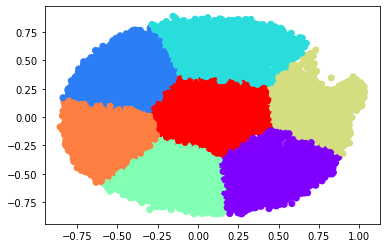

In [285]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c =kmeans.labels_ , cmap ='rainbow')

print(sum(np.min(cdist(X_principal, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X_principal.shape[0])

In [286]:
clustering = []
for i in range(7):
  clustering.append(pd.DataFrame(clus[i],columns=X_principal.columns))
clustering[0].describe()

,P1,P2
count,1728.000000,1728.000000
mean,0.065229,0.036015
std,0.194291,0.163103
min,-0.297452,-0.324162
25%,-0.095863,-0.098482
50%,0.054212,0.040722
75%,0.220094,0.166913
max,0.452535,0.353660


**Elbow method and Silhouette Score**

In [287]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(final)
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.4927598516073796
For n_clusters = 3 The average silhouette_score is : 0.21677458803598493
For n_clusters = 4 The average silhouette_score is : 0.20146206601213265
For n_clusters = 5 The average silhouette_score is : 0.18317187403841328
For n_clusters = 6 The average silhouette_score is : 0.17491407424090846
For n_clusters = 7 The average silhouette_score is : 0.1748766913045732
For n_clusters = 8 The average silhouette_score is : 0.1657741252810139
For n_clusters = 9 The average silhouette_score is : 0.1590635529985685


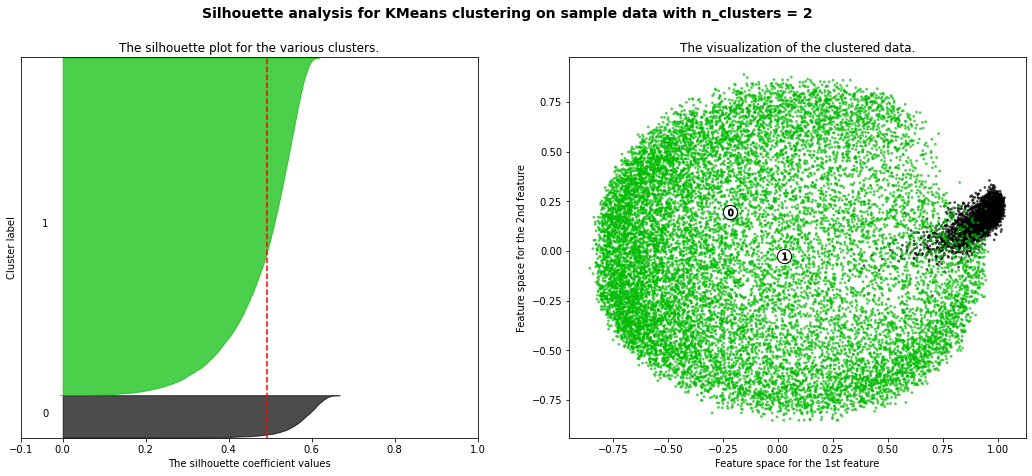

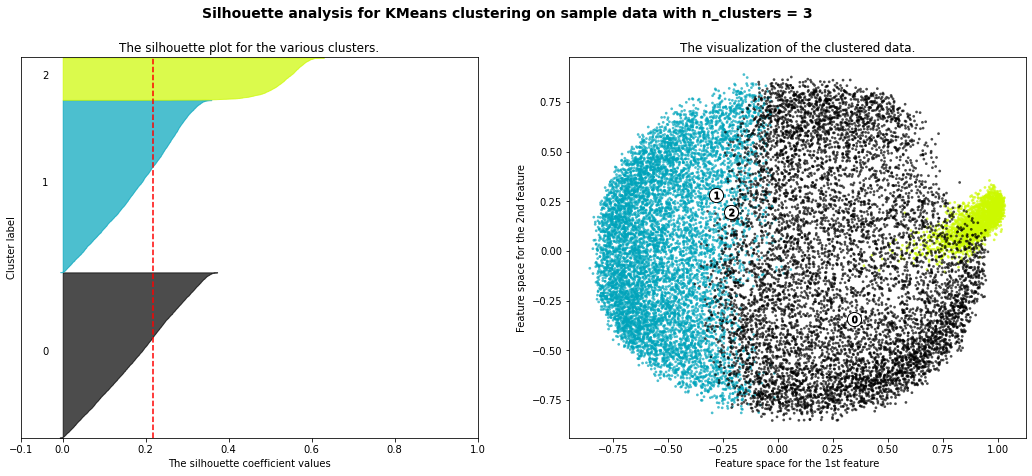

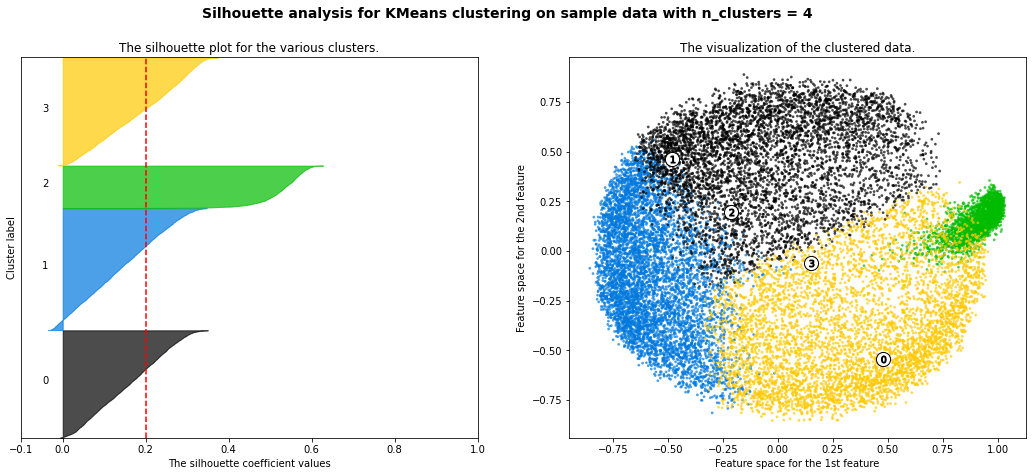

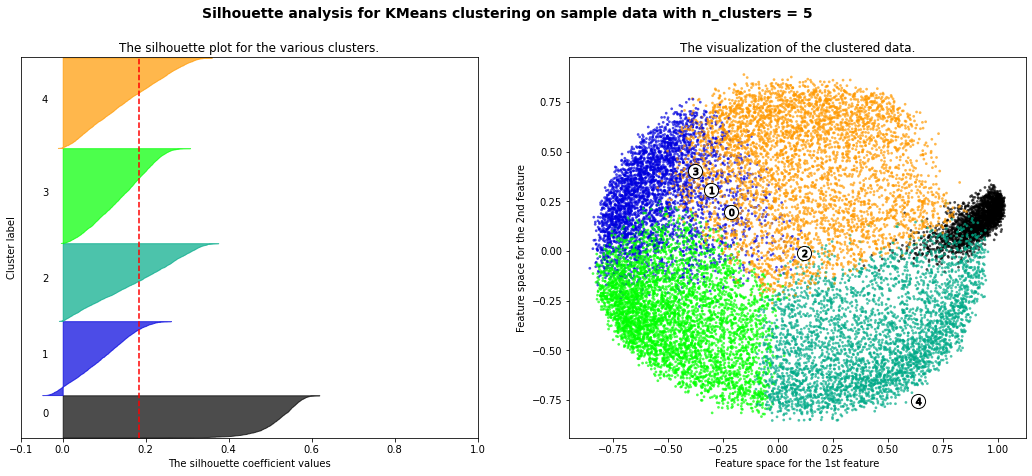

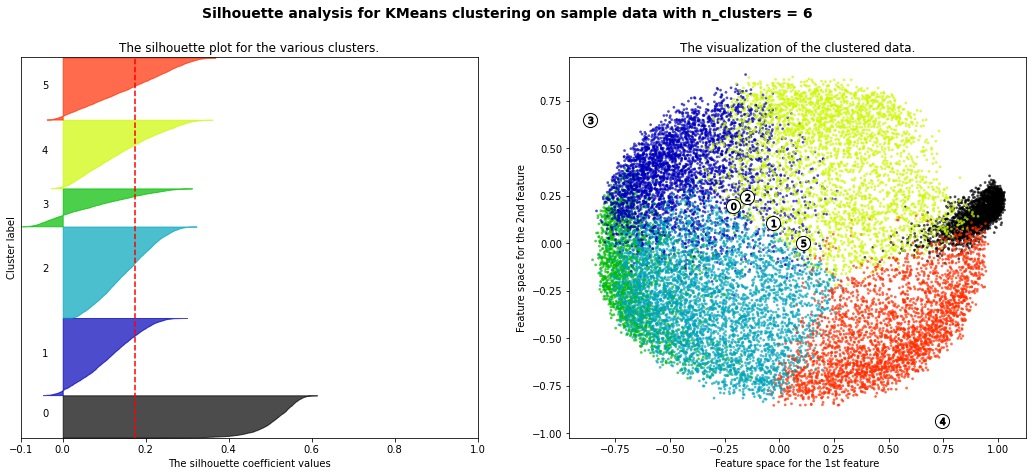

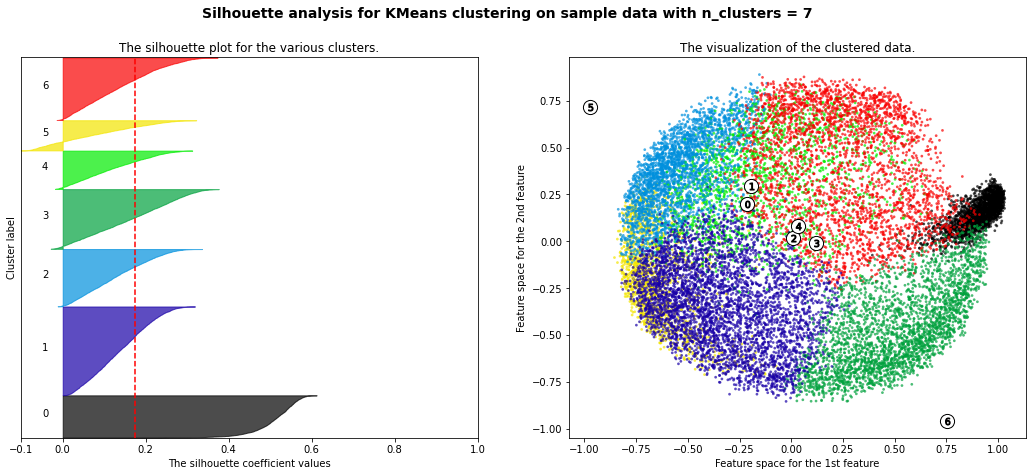

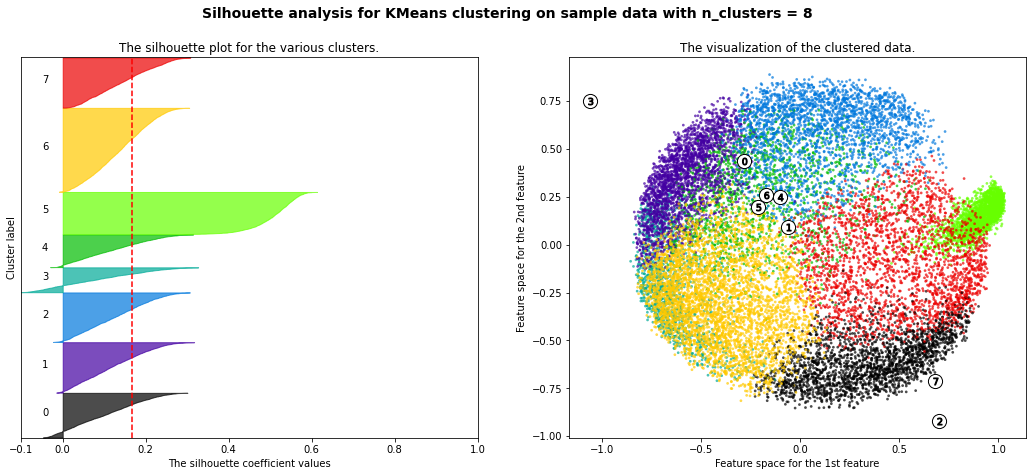

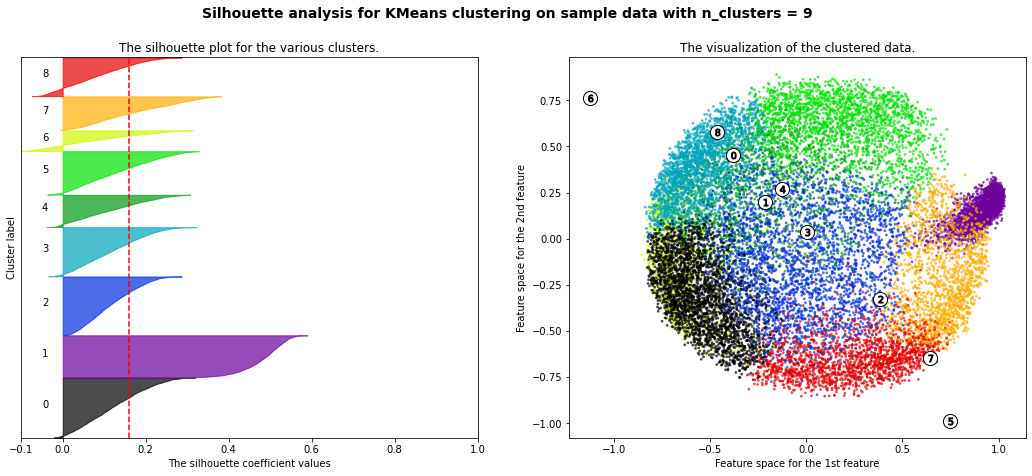

In [288]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(final)
    silhouette_avg = silhouette_score(final, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(final, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

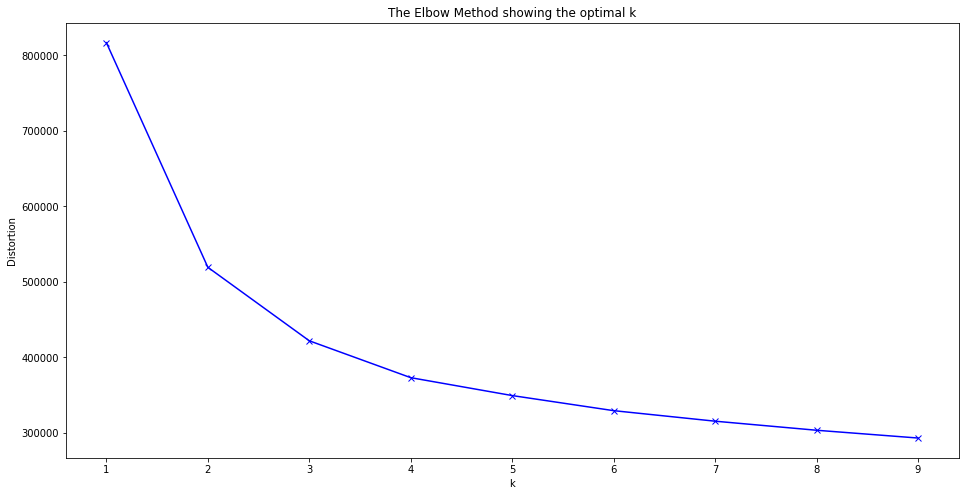

In [289]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


**dbscan algorithm**

In [290]:
final = final.drop('ID', axis = 1)  #it is a unique entity

In [291]:
print(final.head())

        Age   Overall  Potential  ...  GKKicking  GKPositioning  GKReflexes
0  1.258950  4.013533   3.697895  ...  -0.074713      -0.140266   -0.485159
1  1.687246  4.013533   3.697895  ...  -0.074713      -0.140266   -0.318094
2  0.188210  3.724228   3.534819  ...  -0.074713      -0.081569   -0.318094
3  0.402358  3.579576   3.534819  ...   4.287959       4.203333    4.304052
4  0.402358  3.579576   3.371743  ...  -0.680640      -0.375055   -0.206717

[5 rows x 44 columns]


In [292]:
final.head(5)


,Age,Overall,Potential,Height,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1.258950,4.013533,3.697895,-1.646241,2.213456,9.861240,1.594064,2.166613,-0.598602,-0.447829,1.865719,2.532391,1.018293,2.130190,2.434969,2.201010,2.491028,2.925359,2.236808,2.255005,1.767403,1.451998,1.861977,3.680120,2.195558,1.713647,0.246064,0.552243,-0.503390,2.434084,-0.453532,-1.193549,2.254888,2.869478,1.684657,3.265669,-0.717896,-0.909470,-0.923850,-0.599889,-0.318983,-0.074713,-0.140266,-0.485159
1,1.687246,4.013533,3.697895,0.995602,2.308738,9.861240,1.594064,3.488921,-0.786721,1.091328,1.865719,2.481180,2.111424,1.517765,2.491481,1.725114,1.838695,1.895584,1.584271,2.135138,1.633444,1.793263,1.591132,3.791098,0.426984,2.293859,2.529941,1.558789,1.089964,2.382170,0.410222,-0.855334,2.306091,2.021194,2.321491,3.178232,-0.969153,-0.770985,-1.064778,-0.543386,-0.318983,-0.074713,-0.140266,-0.318094
2,0.188210,3.724228,3.534819,-0.891429,1.997240,9.861240,3.108115,3.488921,-0.598602,-1.025012,1.593443,2.122700,0.558028,1.721906,2.321945,2.148132,2.219223,2.524891,1.649524,2.195072,1.968342,1.725010,2.200535,3.569142,1.417385,1.423540,-0.346053,1.118425,-1.300067,1.811115,0.007136,-0.517119,1.998870,2.374645,2.066757,3.090795,-1.019405,-1.094116,-0.595016,-0.430379,-0.437259,-0.074713,-0.081569,-0.318094
3,0.402358,3.579576,3.534819,1.750414,-0.465424,7.324066,0.080012,-1.800313,-1.162960,0.129355,-1.782774,-1.666942,-1.800833,-0.591700,-1.690394,-1.976298,-1.422972,-1.365369,-0.112327,-0.981399,-0.509905,-0.459086,-0.237078,3.125231,-1.483076,-1.419502,0.161476,-1.272122,-0.105051,-1.822867,-1.029368,-0.807018,-1.943796,1.031529,-0.544262,0.817436,-1.622423,-1.232601,-1.534540,4.146377,4.057254,4.287959,4.203333,4.304052
4,0.402358,3.579576,3.371743,-0.136617,2.502966,7.324066,3.108115,2.166613,-0.786721,-0.768486,2.355815,1.866643,0.155296,2.266284,2.208922,1.619359,2.056139,2.296052,2.497823,1.955338,0.896668,0.769468,1.049440,3.236208,0.922185,2.061774,-0.176877,1.684607,0.771294,2.278342,1.158808,0.690792,1.896464,2.869478,1.939390,2.566174,1.040907,0.475378,0.250555,-0.091360,-0.200706,-0.680640,-0.375055,-0.206717


**Print number of points in each cluster**

In [320]:
db_default = DBSCAN(eps = 0.0299, min_samples = 12).fit(X_principal) 
labels = db_default.labels_
outliers = pd.DataFrame(X_principal)
# print (outliers[labels == -1]) 
print(Counter(labels))

Counter({0: 17513, -1: 391, 5: 37, 1: 35, 11: 33, 10: 31, 2: 24, 9: 22, 7: 14, 12: 14, 4: 12, 6: 9, 8: 7, 3: 5})


In [321]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

In [ ]:
# Counter({0: 17830, -1: 189, 3: 39, 2: 28, 4: 24, 6: 16, 1: 14, 5: 7})

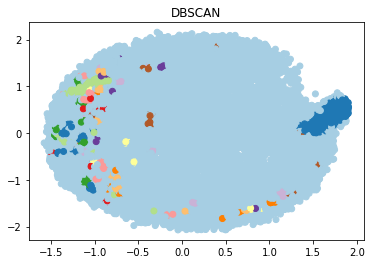

In [322]:
dbscan(X_principal,eps=0.0299,min_samples=12)

**Hierarchical clustering**
**1. Agglomerative**

In [323]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X_scaled = scaler.fit_transform(final) 
  
 
    X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
    X_normalized = pd.DataFrame(X_normalized) 


    #X_normalized = normalize(X_scaled) 
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

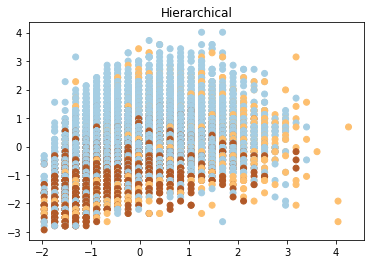

In [324]:
hier(final,n_clusters=3)

**Plot dendrogram**

In [325]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


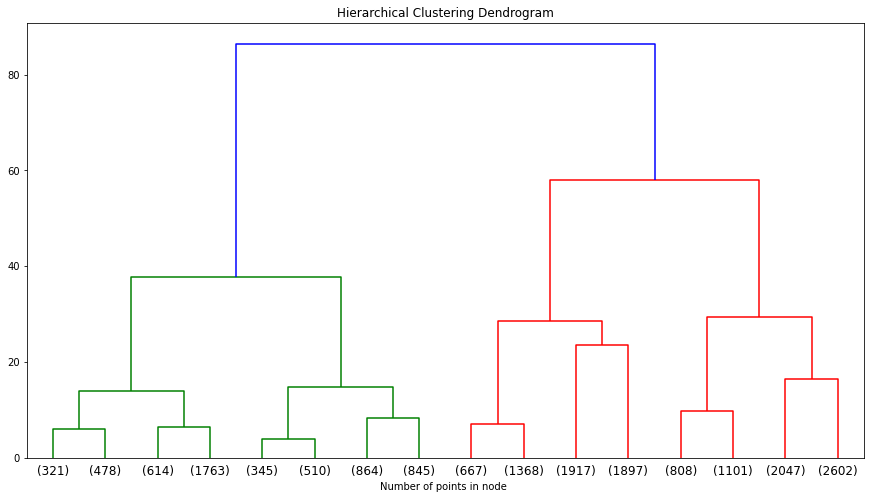

In [327]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_principal)
fig = plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node ")
plt.show()

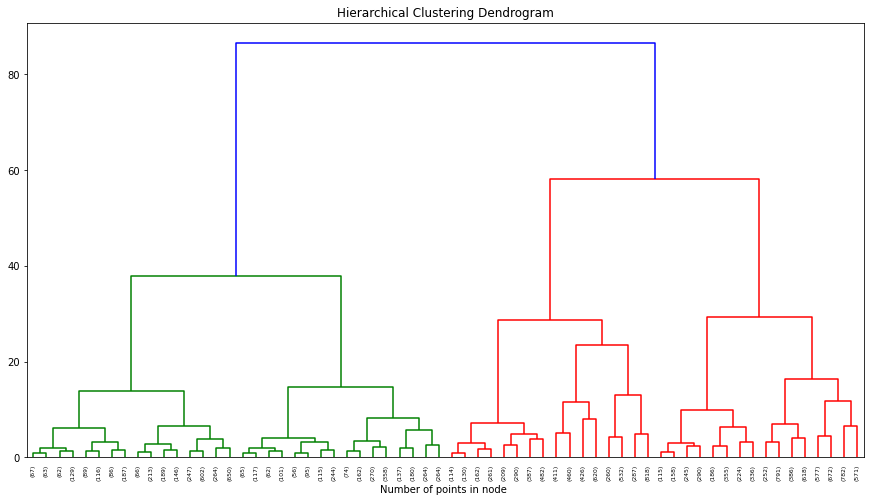

In [328]:
fig = plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node ")
plt.show()

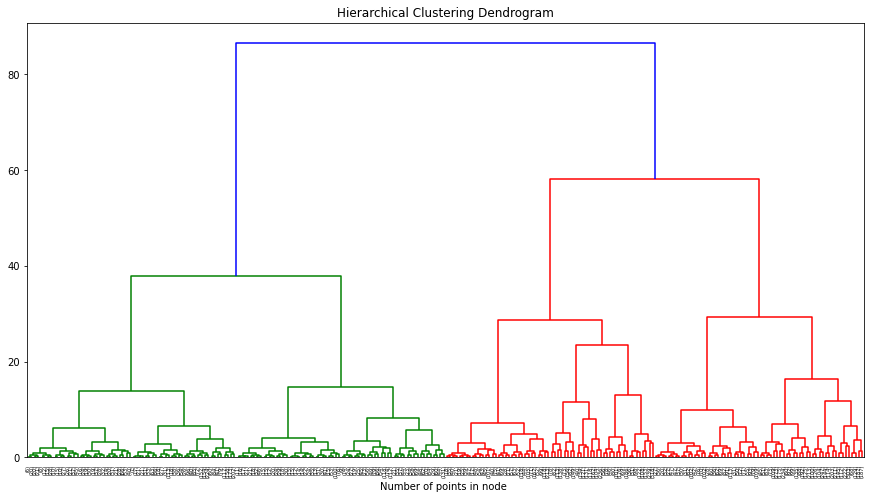

In [329]:
fig = plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=7)
plt.xlabel("Number of points in node ")
plt.show()

**Scatter plot for n_cluster=3**

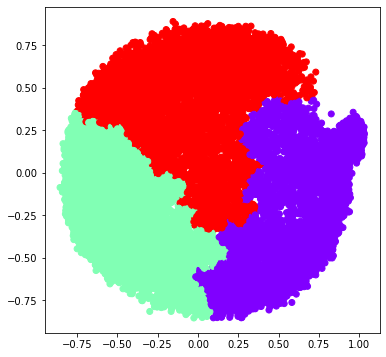

In [330]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


**scatter plot for n_cluster=5**


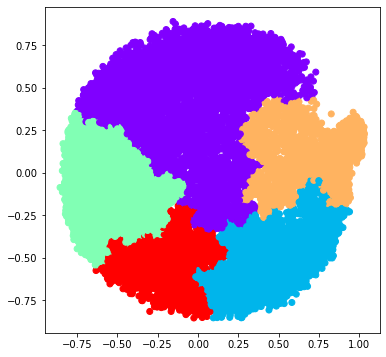

In [331]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


**scatter plot for n_cluster=7**

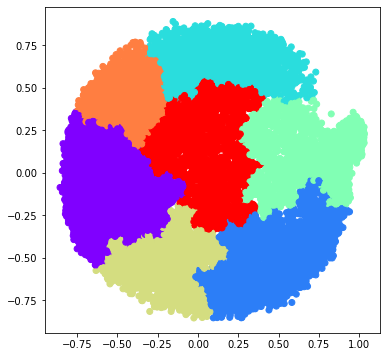

In [332]:
ac7 = AgglomerativeClustering(n_clusters = 7) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac7.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


**Silhouette score for agglomerative method for different no of clusters**

[0.39971857584866094, 0.3504936162964596, 0.37021512045280935]


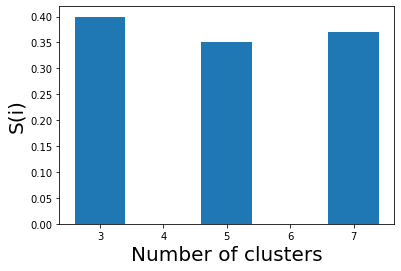

In [333]:
k = [ 3, 5, 7] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( silhouette_score(X_principal, ac7.fit_predict(X_principal))) 
print(silhouette_scores)
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 
